# Инициализация

Загружаем библиотеки необходимые для выполнения кода ноутбука.

In [1]:
import logging

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.figure_format = 'retina'

# === ЭТАП 1 ===

# Загрузка первичных данных

Загружаем первичные данные из файлов:
- tracks.parquet
- catalog_names.parquet
- interactions.parquet

In [4]:
tracks = pd.read_parquet("tracks.parquet")
catalog_names = pd.read_parquet("catalog_names.parquet")
interactions = pd.read_parquet("interactions.parquet")

In [3]:
tracks.sample(5)

,track_id,albums,artists,genres
189899,5964989,"[654893, 2923159, 4313641, 7239867, 7239879, 1...",[35926],"[14, 102]"
469858,32665696,"[10170, 4787777]",[41136],"[2, 102]"
757076,57860292,[8731658],[510185],[68]
473757,32861481,[2519470],[3460890],"[24, 31]"
406038,27976589,[3339108],[3056459],[70]


In [4]:
interactions.sample(5)

,user_id,track_id,track_seq,started_at
94,645510,362085,95,2022-04-11
136,1166079,63110733,137,2022-09-19
3633,234427,58981421,3634,2022-09-27
6,891525,23027100,7,2022-02-18
1284,1076923,76150836,1285,2022-12-05


In [5]:
catalog_names.sample(4)

,id,type,name
439458,8888345,album,Natural Disguise
638012,19235902,album,Trouble
781901,7055706,artist,В Точку
1036167,10449129,track,La La La


# Обзор данных

Проверяем данные, есть ли с ними явные проблемы.

In [5]:
# Выводим базовую информацию для понимания структуры данных
print("Tracks:")
print(tracks.info(), "\n")
print("Catalog Names:")
print(catalog_names.info(), "\n")
print("Interactions:")
print(interactions.info(), "\n")

Tracks:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   track_id  1000000 non-null  int64 
 1   albums    1000000 non-null  object
 2   artists   1000000 non-null  object
 3   genres    1000000 non-null  object
dtypes: int64(1), object(3)
memory usage: 30.5+ MB
None 

Catalog Names:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1812471 entries, 0 to 1812470
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   id      int64 
 1   type    object
 2   name    object
dtypes: int64(1), object(2)
memory usage: 41.5+ MB
None 

Interactions:
<class 'pandas.core.frame.DataFrame'>
Index: 222629898 entries, 0 to 291
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   user_id     int32         
 1   track_id    int32         
 2   track_seq   int16         
 3   started_at  da

Операция по приведению типов - затратная вычислительная операция. Далее рассмотрены два варианта:
* преобразование столбцов к строковому виду батчами
* использование библиотеки Dask

In [6]:
# Чтобы не выбивало kernel на этапе приведения типов, напишем функцию
def convert_column_to_str_batches(df, col_name, batch_size=100000):
    """
    Преобразует столбец col_name в DataFrame df к строковому типу батчами.
    Сначала столбец приводится к типу object, чтобы избежать предупреждений.
    
    :param df: DataFrame, содержащий столбец
    :param col_name: имя столбца, который нужно привести к str
    :param batch_size: размер батча для обработки (по умолчанию 100000 строк)
    :return: DataFrame с преобразованным столбцом
    """
    # Сначала меняем тип столбца на object для избежания предупреждений
    df[col_name] = df[col_name].astype(object)
    
    total_rows = len(df)
    col_index = df.columns.get_loc(col_name)
    
    for start in range(0, total_rows, batch_size):
        end = min(start + batch_size, total_rows)
        df.iloc[start:end, col_index] = df.iloc[start:end, col_index].astype(str)
        print(f"Обработано строк с {start} до {end}")
        
    return df

In [ ]:
# Для tracks: преобразуем столбец track_id
tracks = convert_column_to_str_batches(tracks, 'track_id')

# Для catalog_names: преобразуем столбец id
catalog_names = convert_column_to_str_batches(catalog_names, 'id')

# Для interactions: преобразуем столбцы track_id и user_id
interactions = convert_column_to_str_batches(interactions, 'track_id')
interactions = convert_column_to_str_batches(interactions, 'user_id')

Обработано строк с 0 до 100000
Обработано строк с 100000 до 200000
Обработано строк с 200000 до 300000
Обработано строк с 300000 до 400000
Обработано строк с 400000 до 500000
Обработано строк с 500000 до 600000
Обработано строк с 600000 до 700000
Обработано строк с 700000 до 800000
Обработано строк с 800000 до 900000
Обработано строк с 900000 до 1000000
Обработано строк с 0 до 100000
Обработано строк с 100000 до 200000
Обработано строк с 200000 до 300000
Обработано строк с 300000 до 400000
Обработано строк с 400000 до 500000
Обработано строк с 500000 до 600000
Обработано строк с 600000 до 700000
Обработано строк с 700000 до 800000
Обработано строк с 800000 до 900000
Обработано строк с 900000 до 1000000
Обработано строк с 1000000 до 1100000
Обработано строк с 1100000 до 1200000
Обработано строк с 1200000 до 1300000
Обработано строк с 1300000 до 1400000
Обработано строк с 1400000 до 1500000
Обработано строк с 1500000 до 1600000
Обработано строк с 1600000 до 1700000
Обработано строк с 170

Оперативной памяти не хватает для завершения операции даже при преобразовании батчами. Используем dask. Он позволяет работать с данными, превышающими объем оперативной памяти, обрабатывая их порциями.

In [2]:
import dask.dataframe as dd
import pyarrow as pa

# Читаем данные из Parquet с помощью Dask
tracks_dd = dd.read_parquet('tracks.parquet')
catalog_names_dd = dd.read_parquet('catalog_names.parquet')
interactions_dd = dd.read_parquet('interactions.parquet')

# Преобразуем только идентификаторы:
tracks_dd['track_id'] = tracks_dd['track_id'].astype(str)
catalog_names_dd['id'] = catalog_names_dd['id'].astype(str)
interactions_dd['track_id'] = interactions_dd['track_id'].astype(str)
interactions_dd['user_id'] = interactions_dd['user_id'].astype(str)

# Явное задание схемы для сохранения данных
tracks_schema = pa.schema([
    pa.field('track_id', pa.string()),
    # Поля albums, artists, genres оставляем как список целых чисел:
    pa.field('albums', pa.list_(pa.int64())),
    pa.field('artists', pa.list_(pa.int64())),
    pa.field('genres', pa.list_(pa.int64()))
])

catalog_names_schema = pa.schema([
    pa.field('id', pa.string()),
    pa.field('type', pa.string()),
    pa.field('name', pa.string())
])

interactions_schema = pa.schema([
    pa.field('user_id', pa.string()),
    pa.field('track_id', pa.string()),
    pa.field('track_seq', pa.int16()),
    pa.field('started_at', pa.timestamp('ns'))
])

# Сохранение данных с использованием явной схемы
tracks_dd.to_parquet('tracks_sample_converted.parquet',
                     schema=tracks_schema, write_index=False)
catalog_names_dd.to_parquet('catalog_names_sample_converted.parquet',
                            schema=catalog_names_schema, write_index=False)
interactions_dd.to_parquet('interactions_sample_converted.parquet',
                           schema=interactions_schema, write_index=False)

print("Преобразование идентификаторов завершено и данные сохранены."

Преобразование идентификаторов завершено и данные сохранены.


In [2]:
# Снова читаем данные
tracks = pd.read_parquet("tracks_sample_converted.parquet")
catalog_names = pd.read_parquet("catalog_names_sample_converted.parquet")
interactions = pd.read_parquet("interactions_sample_converted.parquet")

In [4]:
# Повторно проверяем структуру
print("Tracks:")
print(tracks.info(), "\n")
print("Catalog Names:")
print(catalog_names.info(), "\n")
print("Interactions:")
print(interactions.info(), "\n")

Tracks:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   track_id  1000000 non-null  object
 1   albums    1000000 non-null  object
 2   artists   1000000 non-null  object
 3   genres    1000000 non-null  object
dtypes: object(4)
memory usage: 30.5+ MB
None 

Catalog Names:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1812471 entries, 0 to 1812470
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   id      object
 1   type    string
 2   name    string
dtypes: object(1), string(2)
memory usage: 41.5+ MB
None 

Interactions:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222629898 entries, 0 to 222629897
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   user_id     object        
 1   track_id    object        
 2   track_seq   int16         
 3   started_at  

In [8]:
# Проверка наличия пропущенных значений
print("Пропущенные значения в tracks:\n", tracks.isna().sum(), "\n")
print("Пропущенные значения в catalog_names:\n", catalog_names.isna().sum(), "\n")
print("Пропущенные значения в interactions:\n", interactions.isna().sum(), "\n")

Пропущенные значения в tracks:
 track_id    0
albums      0
artists     0
genres      0
dtype: int64 

Пропущенные значения в catalog_names:
 id      0
type    0
name    0
dtype: int64 

Пропущенные значения в interactions:
 user_id       0
track_id      0
track_seq     0
started_at    0
dtype: int64 



In [9]:
# Проверка треков на наличие неизвестных исполнителей, альбомов, жанров
# Предполагаем, что неизвестные данные могут быть представлены как NaN или пустой список
def count_unknowns(df, column):
    # Если значение NaN или если это список и он пустой — считаем как неизвестное
    unknown_mask = df[column].isna() | (df[column].apply(lambda x: isinstance(x, list) and len(x) == 0))
    return unknown_mask.sum()

unknown_albums = count_unknowns(tracks, 'albums')
unknown_artists = count_unknowns(tracks, 'artists')
unknown_genres = count_unknowns(tracks, 'genres')

print(f"Треков с неизвестными альбомами: {unknown_albums}")
print(f"Треков с неизвестными исполнителями: {unknown_artists}")
print(f"Треков с неизвестными жанрами: {unknown_genres}")

Треков с неизвестными альбомами: 0
Треков с неизвестными исполнителями: 0
Треков с неизвестными жанрами: 0


# Выводы

Приведём выводы по первому знакомству с данными:
* В данных нет пропущенных значений
* Идентификаторы (track_id, id, user_id) приведены к строковому типу
* Поля albums, artists и genres сохранены как списки
* Проверка показала отсутствие "неизвестных" значений
* Корректирующие действия: приведение идентификаторов к строкам и проверка целостности структуры данных

# === ЭТАП 2 ===

# EDA

Распределение количества прослушанных треков.

Статистика прослушиваний по пользователям:
       listen_count
count  1.373221e+06
mean   1.621224e+02
std    3.512846e+02
min    1.000000e+00
25%    2.300000e+01
50%    5.500000e+01
75%    1.540000e+02
max    1.663700e+04


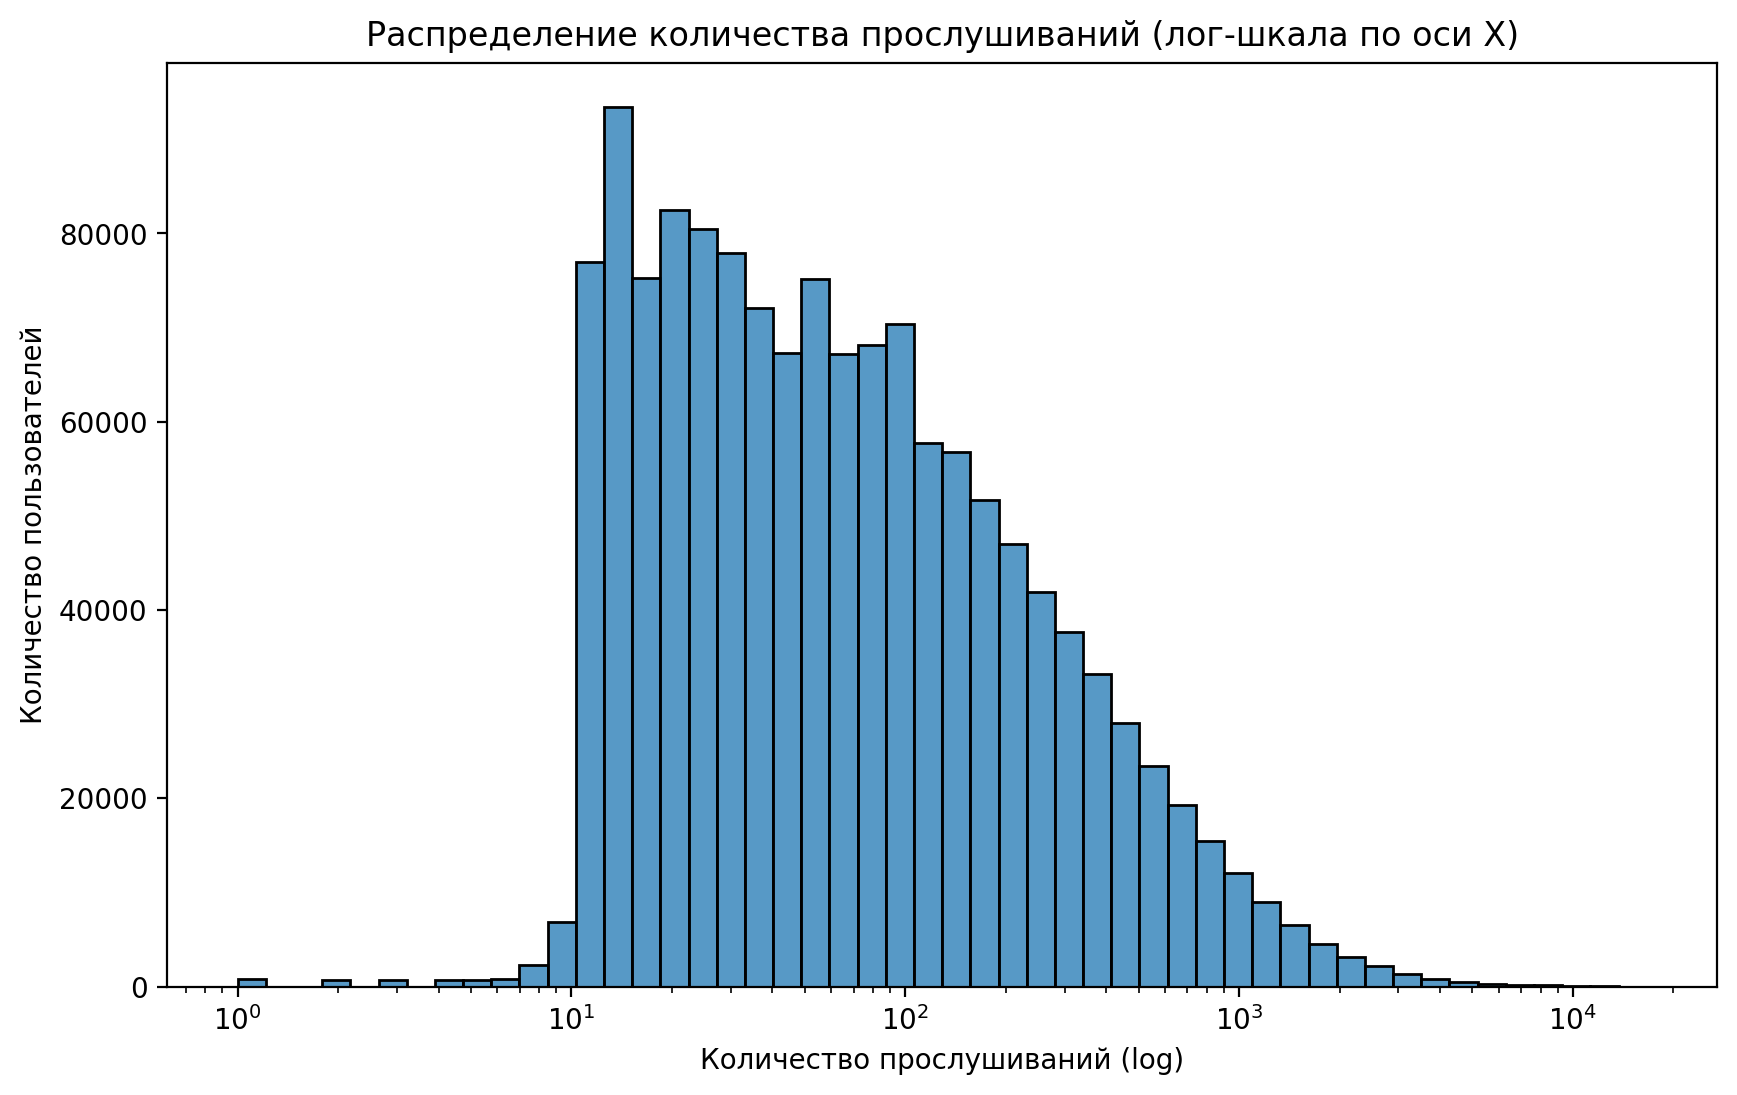

In [4]:
user_listen_counts = interactions.groupby('user_id').size().reset_index(name='listen_count')
print("Статистика прослушиваний по пользователям:")
print(user_listen_counts.describe())

plt.figure(figsize=(10, 6))
sns.histplot(user_listen_counts['listen_count'], bins=50, edgecolor='black', log_scale=(True, False))
plt.title("Распределение количества прослушиваний (лог-шкала по оси X)")
plt.xlabel("Количество прослушиваний (log)")
plt.ylabel("Количество пользователей")
plt.show()

Наиболее популярные треки

In [6]:
track_counts = interactions.groupby('track_id').size().reset_index(name='play_count')
popular_tracks = track_counts.sort_values(by='play_count', ascending=False).head(10)
print("Наиболее популярные треки:")
print(popular_tracks)

Наиболее популярные треки:
        track_id  play_count
635470     53404      111062
340231  33311009      106921
92204     178529      101924
372354  35505245       99490
775274  65851540       86670
202054  24692821       86246
331076  32947997       85886
607754  51241318       85244
900172    795836       85042
546428  45499814       84748


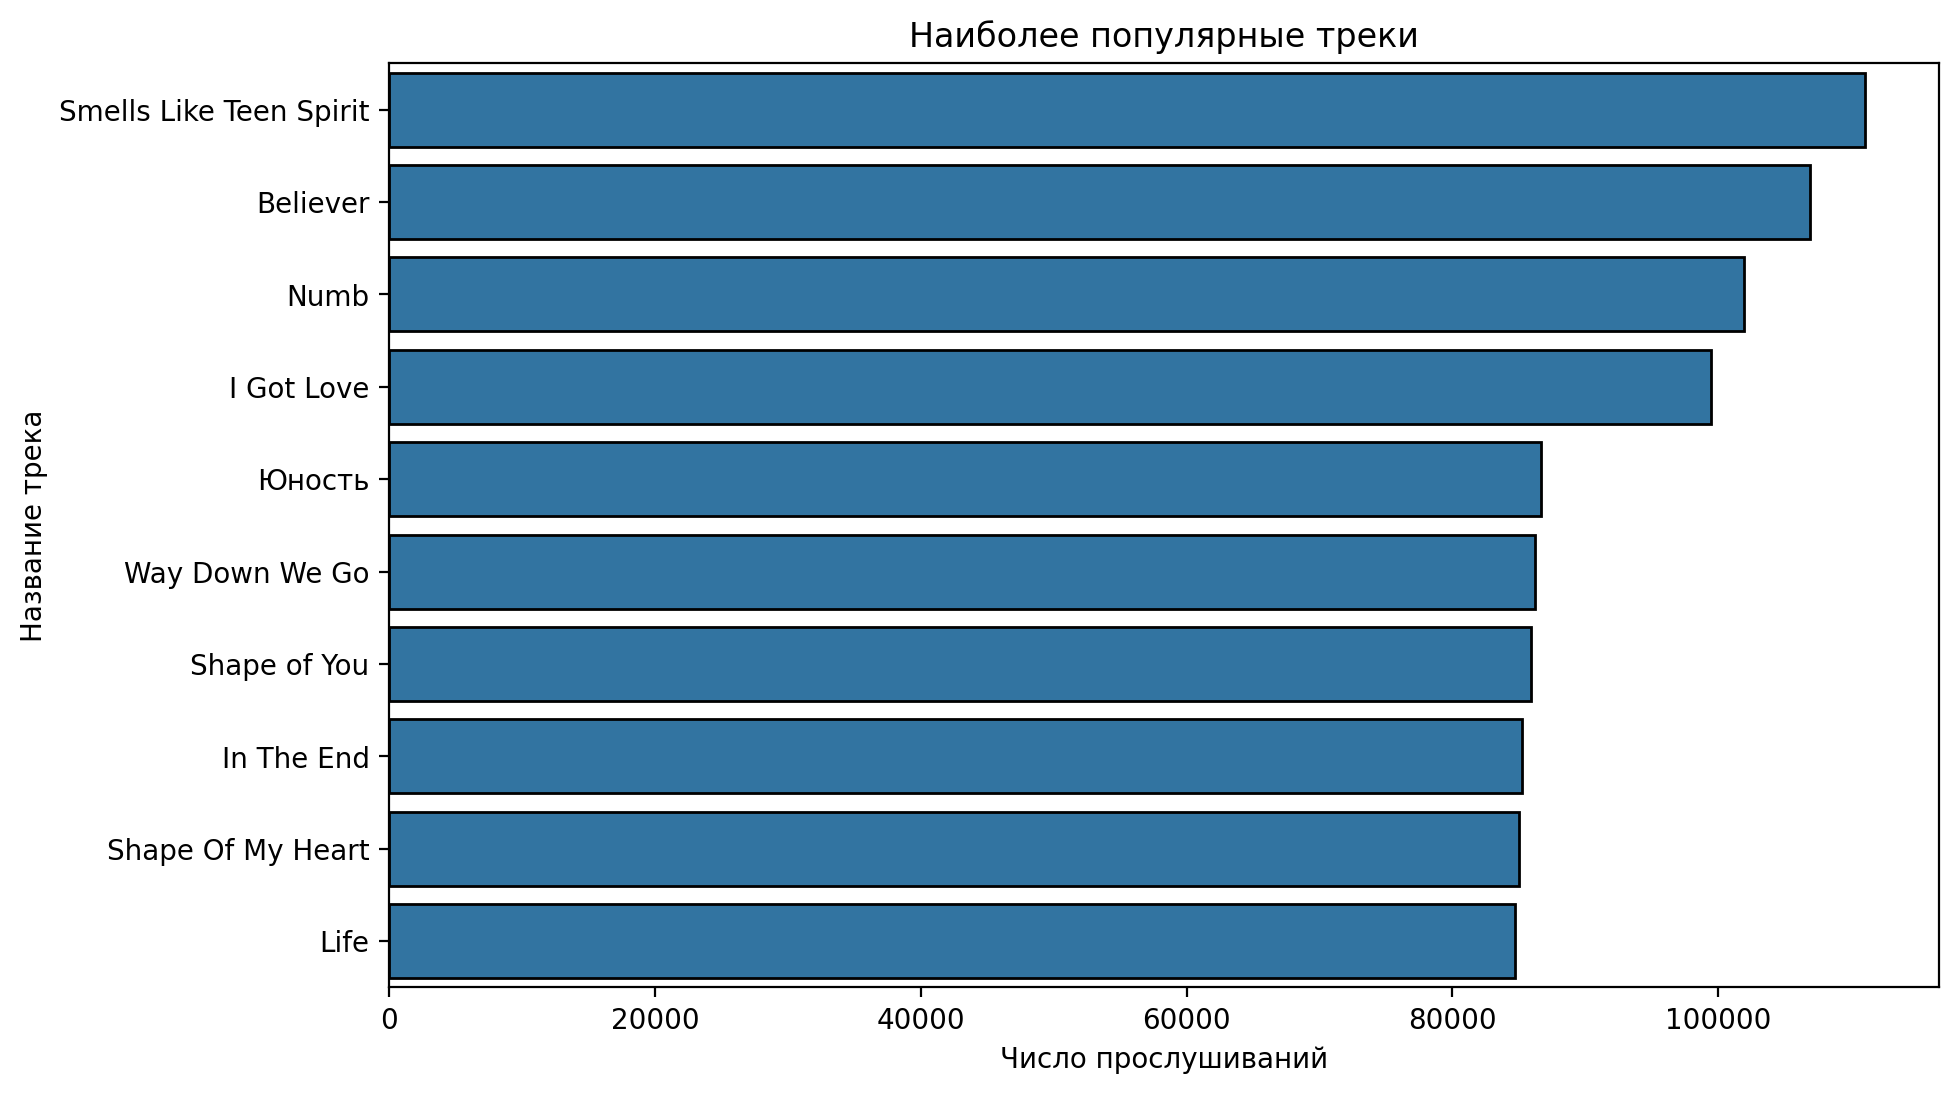

In [7]:
tracks_info = catalog_names.query("type == 'track'").rename(columns={'id': 'track_id', 'name': 'track_name'})
popular_tracks_named = popular_tracks.merge(tracks_info[['track_id', 'track_name']], on='track_id', how='left')
popular_tracks_named['track_name'] = popular_tracks_named['track_name'].fillna("Unknown")

plt.figure(figsize=(10, 6))
sns.barplot(data=popular_tracks_named, x='play_count', y='track_name', edgecolor='black')
plt.title("Наиболее популярные треки")
plt.xlabel("Число прослушиваний")
plt.ylabel("Название трека")
plt.show()

Наиболее популярные жанры

In [17]:
import pandas as pd
import numpy as np

def ensure_list(x):
    """
    Приводит входящее значение к типу list.
    """
    if isinstance(x, (list, np.ndarray)):
        return list(x)
    elif pd.isna(x):
        return []
    else:
        return [x]

# Группировка interactions по track_id, считаем прослушивания
track_plays = interactions.groupby('track_id').size().reset_index(name='play_count')

# Объединение с таблицей треков
tracks_merged = tracks.merge(track_plays, on='track_id', how='left').fillna({'play_count': 0})
tracks_merged['genres'] = tracks_merged['genres'].apply(ensure_list)

tracks_exploded = tracks_merged.explode('genres').dropna(subset=['genres'])
tracks_exploded['genres'] = tracks_exploded['genres'].astype(str)

# добавляем названия жанров из catalog_names
genre_names = catalog_names.query("type == 'genre'")[['id', 'name']].rename(columns={'id': 'genres', 'name': 'genre_name'})

genre_counts_named = (
    tracks_exploded
    .groupby('genres')['play_count'].sum().reset_index()
    .merge(genre_names, on='genres', how='left')
)

# Топ-10 жанров
popular_genres = genre_counts_named.sort_values(by='play_count', ascending=False).head(10)

print("Наиболее популярные жанры:")
print(popular_genres[['genres', 'genre_name', 'play_count']])

Наиболее популярные жанры:
    genres   genre_name  play_count
11      11          pop    55578312
144     75          rap    37799821
4      102      allrock    31092013
72      20       ruspop    26626241
84       3       rusrap    25303695
133     68  electronics    20120981
56      16        dance    16291557
71       2      rusrock    13166147
40      14         rock    12772644
108     47        metal    12437375


Треки, которые никто не прослушал

In [18]:
all_tracks_set = set(tracks['track_id'])
interacted_tracks_set = set(interactions['track_id'])
not_listened_tracks = all_tracks_set - interacted_tracks_set
print(f"Количество треков, которые никто не прослушал: {len(not_listened_tracks)}")
print("Примеры треков, которые никто не прослушал:")
print(list(not_listened_tracks)[:10])

Количество треков, которые никто не прослушал: 0
Примеры треков, которые никто не прослушал:
[]


# Преобразование данных

Преобразуем данные в формат, более пригодный для дальнейшего использования в расчётах рекомендаций.

In [ ]:
# Копирование исходных данных с новыми именами
items = tracks.copy()
events = interactions.copy()

# Оставляем только пользователей с >=2 событиями (оптимизировано!)
user_counts = events.groupby('user_id').size()
valid_users = user_counts[user_counts >= 2].index
events = events[events['user_id'].isin(valid_users)].copy()

# Переименование столбцов: track_id в item_id
items.rename(columns={'track_id': 'item_id'}, inplace=True)
events.rename(columns={'track_id': 'item_id'}, inplace=True)

# названия треков из catalog_names
track_names = (
    catalog_names
    .query("type == 'track'")[['id', 'name']]
    .rename(columns={'id': 'item_id', 'name': 'track_name'})
)
items = items.merge(track_names, on='item_id', how='left')
items['track_name'] = items['track_name'].fillna("Unknown")

# Перекодировка user_id эффективно через категории, иначе kernel restarted
events['user_id'] = events['user_id'].astype('category')
user_mapping = dict(enumerate(events['user_id'].cat.categories, start=1_000_000))

events['old_user_id'] = events['user_id']
events['user_id'] = events['user_id'].cat.codes + 1_000_000

events.drop(columns=['old_user_id'], inplace=True)

Вариант с использованием dask, если код выше не выполняется и ядро перезапускается

In [5]:
import dask.dataframe as dd

# Чтение данных, если ещё не загружены
tracks_dd = dd.read_parquet("tracks_sample_converted.parquet")
interactions_dd = dd.read_parquet("interactions_sample_converted.parquet")
catalog_names_dd = dd.read_parquet("catalog_names_sample_converted.parquet")

In [10]:
import pyarrow as pa

# Копирование с новыми именами
items_dd = tracks_dd.rename(columns={'track_id': 'item_id'})
events_dd = interactions_dd.rename(columns={'track_id': 'item_id'})

# Считаем количество взаимодействий пользователей и оставляем тех, у кого более 2 событий
user_counts_dd = interactions_dd.groupby('user_id').size().compute()
valid_users = user_counts_dd[user_counts_dd >= 2].index
events_dd = events_dd[events_dd['user_id'].isin(valid_users)]

# Присоединяем названия треков
track_names_dd = catalog_names_dd.query("type == 'track'")[['id', 'name']].rename(columns={'id': 'item_id', 'name': 'track_name'})
items_dd = (
    tracks_dd.rename(columns={'track_id': 'item_id'})
    .merge(track_names_dd, on='item_id', how='left')
)
items_dd['track_name'] = items_dd['track_name'].fillna('Unknown')

# Перекодировка пользователей через категории
events_dd['user_id'] = events_dd['user_id'].astype('category')
events_dd['user_id'] = events_dd['user_id'].cat.as_known()
events_dd['user_id'] = events_dd['user_id'].cat.codes + 1_000_000

# Указываем явную схему для Parquet для решения ArrowTypeError
items_schema = pa.schema([
    pa.field('item_id', pa.string()),
    pa.field('albums', pa.list_(pa.int64())),
    pa.field('artists', pa.list_(pa.int64())),
    pa.field('genres', pa.list_(pa.int64())),
    pa.field('track_name', pa.string())
])

events_schema = pa.schema([
    pa.field('user_id', pa.int32()),
    pa.field('item_id', pa.string()),
    pa.field('track_seq', pa.int16()),
    pa.field('started_at', pa.timestamp('ns'))
])

# Сохранение в Parquet
items_dd.to_parquet("items.parquet", schema=items_schema, write_index=False)
events_dd.to_parquet("events.parquet", schema=events_schema, write_index=False)

print("Обработанные файлы сохранены успешно")

Обработанные файлы сохранены успешно


# Сохранение данных

Сохраним данные в двух файлах в персональном S3-бакете по пути `recsys/data/`:
- `items.parquet` — все данные о музыкальных треках,
- `events.parquet` — все данные о взаимодействиях.

In [2]:
import os
import s3fs
import pyarrow as pa

from dotenv import load_dotenv

load_dotenv()

# Читаем креды
S3_BUCKET_NAME = os.getenv("S3_BUCKET_NAME")
AWS_ACCESS_KEY_ID = os.getenv("AWS_ACCESS_KEY_ID")
AWS_SECRET_ACCESS_KEY = os.getenv("AWS_SECRET_ACCESS_KEY")

# Проверяем, загружены ли креды
if not all([S3_BUCKET_NAME, AWS_ACCESS_KEY_ID, AWS_SECRET_ACCESS_KEY]):
    raise ValueError("Не найдены креды в .env файле!")

# endpoint для Yandex Object Storage
S3_ENDPOINT_URL = "https://storage.yandexcloud.net"

# Настройки для хранения в Yandex Object Storage
storage_options = {
    "key": AWS_ACCESS_KEY_ID,
    "secret": AWS_SECRET_ACCESS_KEY,
    "endpoint_url": S3_ENDPOINT_URL
}

# Формируем пути для сохранения файлов
s3_items_path = f"s3://{S3_BUCKET_NAME}/recsys/data/items.parquet"
s3_events_path = f"s3://{S3_BUCKET_NAME}/recsys/data/events.parquet"

# Указываем явную схему для Parquet для решения ArrowTypeError
items_schema = pa.schema([
    pa.field('item_id', pa.string()),
    pa.field('albums', pa.list_(pa.int64())),
    pa.field('artists', pa.list_(pa.int64())),
    pa.field('genres', pa.list_(pa.int64())),
    pa.field('track_name', pa.string())
])

events_schema = pa.schema([
    pa.field('user_id', pa.int32()),
    pa.field('item_id', pa.string()),
    pa.field('track_seq', pa.int16()),
    pa.field('started_at', pa.timestamp('ns'))
])

# Сохранение файлов в S3 (Yandex Object Storage)
items_dd.to_parquet(s3_items_path, schema=items_schema, write_index=False, storage_options=storage_options)
events_dd.to_parquet(s3_events_path, schema=events_schema, write_index=False, storage_options=storage_options)

print("Файлы items.parquet и events.parquet успешно сохранены в Yandex Object Storage")

Файлы items.parquet и events.parquet успешно сохранены в Yandex Object Storage


# Очистка памяти

Здесь, может понадобится очистка памяти для высвобождения ресурсов для выполнения кода ниже. 

Приведите соответствующие код, комментарии, например:
- код для удаление более ненужных переменных,
- комментарий, что следует перезапустить kernel, выполнить такие-то начальные секции и продолжить с этапа 3.

In [3]:
import gc

# Удаляем переменные, которые больше не нужны для дальнейших вычислений
del tracks, interactions, catalog_names, track_names, user_counts, valid_users, unique_users, user_mapping

# Принудительный сбор мусора для освобождения памяти
gc.collect()

print("Память очищена. Если наблюдаются проблемы с ресурсами, рекомендуется перезапустить kernel")

NameError: name 'tracks' is not defined

# === ЭТАП 3 ===

# Загрузка данных

Если необходимо, то загружаем items.parquet, events.parquet.

In [1]:
import dask.dataframe as dd
import os
from dotenv import load_dotenv

# Загружаем переменные окружения из .env
load_dotenv()

# Читаем креды из .env
S3_BUCKET_NAME = os.getenv("S3_BUCKET_NAME")
AWS_ACCESS_KEY_ID = os.getenv("AWS_ACCESS_KEY_ID")
AWS_SECRET_ACCESS_KEY = os.getenv("AWS_SECRET_ACCESS_KEY")

# Проверяем, загружены ли креды
if not all([S3_BUCKET_NAME, AWS_ACCESS_KEY_ID, AWS_SECRET_ACCESS_KEY]):
    raise ValueError("Не найдены креды в .env файле! Проверь содержимое .env.")

# Правильный endpoint для Yandex Object Storage
S3_ENDPOINT_URL = "https://storage.yandexcloud.net"

# Настройки для подключения к S3
storage_options = {
    "key": AWS_ACCESS_KEY_ID,
    "secret": AWS_SECRET_ACCESS_KEY,
    "endpoint_url": S3_ENDPOINT_URL
}

# Пути к файлам
s3_items_path = f"s3://{S3_BUCKET_NAME}/recsys/data/items.parquet"
s3_events_path = f"s3://{S3_BUCKET_NAME}/recsys/data/events.parquet"

# Загружаем файлы обратно в Dask DataFrame
items_dd = dd.read_parquet(s3_items_path, storage_options=storage_options)
events_dd = dd.read_parquet(s3_events_path, storage_options=storage_options)

# Выводим 5 первых строк для проверки
print("items.parquet:")
print(items_dd.head())

print("\nevents.parquet:")
print(events_dd.head())

items.parquet:
  item_id                                             albums artists  \
0      26                                       [3, 2490753]    [16]   
1      38                                       [3, 2490753]    [16]   
2     135                                 [12, 214, 2490809]    [84]   
3     136                                 [12, 214, 2490809]    [84]   
4     138  [12, 214, 322, 72275, 72292, 91199, 213505, 24...    [84]   

     genres                           track_name  
0  [11, 21]                     Complimentary Me  
1  [11, 21]                          Momma's Boy  
2      [11]                              Atticus  
3      [11]                             24 Hours  
4      [11]  Don't Upset The Rhythm (Go Baby Go)  

events.parquet:
   user_id item_id  track_seq started_at
0  1000000   99262          1 2022-07-17
1  1000000  589498          2 2022-07-19
2  1000000  590262          3 2022-07-21
3  1000000  590303          4 2022-07-22
4  1000000  590692      

# Разбиение данных

Разбиваем данные на тренировочную, тестовую выборки.

In [7]:
import pandas as pd

# Определяем точку разбиения
train_test_global_time_split_date = pd.to_datetime("2022-12-16")

# Создаём Dask индексы для фильтрации
train_test_global_time_split_idx = events_dd["started_at"] < train_test_global_time_split_date

# Разбиваем события на train и test
events_train_dd = events_dd[train_test_global_time_split_idx]
events_test_dd = events_dd[~train_test_global_time_split_idx]

# Выгружаем в Pandas (если нужно обработать в памяти)
events_train = events_train_dd.compute()
events_test = events_test_dd.compute()

# Количество пользователей в train и test
users_train = events_train["user_id"].unique()
users_test = events_test["user_id"].unique()

# Определяем количество пользователей, попавших в обе выборки
common_users = set(users_train) & set(users_test)

# Путь для сохранения
s3_events_train_path = f"s3://{S3_BUCKET_NAME}/recsys/data/events_train.parquet"
s3_events_test_path = f"s3://{S3_BUCKET_NAME}/recsys/data/events_test.parquet"

# Сохраняем в S3
print("Сохранение данных в S3...")
events_train.to_parquet(
    s3_events_train_path,
    storage_options=storage_options,
    index=False
)
events_test.to_parquet(
    s3_events_test_path,
    storage_options=storage_options,
    index=False
)

# Выводим статистику
print(f"Тренировочная выборка: {len(events_train)} записей")
print(f"Тестовая выборка: {len(events_test)} записей")
print(f"Пользователей в train: {len(users_train)}")
print(f"Пользователей в test: {len(users_test)}")
print(f"Общие пользователи в train и test: {len(common_users)}")

Сохранение данных в S3...
Тренировочная выборка: 208730442 записей
Тестовая выборка: 13898607 записей
Пользователей в train: 1341756
Пользователей в test: 783486
Общие пользователи в train и test: 752870


# Топ популярных

Рассчитаем рекомендации как топ популярных.

In [3]:
from sklearn.preprocessing import MinMaxScaler

# Группируем по item_id: считаем количество уникальных пользователей
item_popularity = (
    events_train.groupby("item_id")
    .agg(users=("user_id", "nunique"))  # Количество уникальных пользователей
    .reset_index()
)

# Нормализуем количество пользователей
scaler = MinMaxScaler()
item_popularity["users_norm"] = scaler.fit_transform(item_popularity[["users"]])

# Используем нормализованное значение как score
item_popularity["popularity_score"] = item_popularity["users_norm"]

# Сортируем по убыванию популярности
item_popularity = item_popularity.sort_values(by="popularity_score", ascending=False)

# Отбираем топ-100 треков
top_k_pop_items = item_popularity.head(100)

# Пути для сохранения в S3
s3_top_popular_path = f"s3://{S3_BUCKET_NAME}/recsys/recommendations/top_popular.parquet"

# Сохраняем в S3
top_k_pop_items.to_parquet(s3_top_popular_path, storage_options=storage_options, index=False)

print(f"Файл с топ-100 популярными треками сохранён в {s3_top_popular_path}")

Файл с топ-100 популярными треками сохранён в s3://s3-student-mle-20240325-963286077c/recsys/recommendations/top_popular.parquet


In [4]:
top_k_pop_items.head()

,item_id,users,users_norm,popularity_score
635440,53404,110025,1.000000,1.000000
340202,33311009,101075,0.918654,0.918654
92175,178529,100866,0.916755,0.916755
372325,35505245,95523,0.868192,0.868192
202025,24692821,84153,0.764851,0.764851


# Персональные

Рассчитаем персональные рекомендации.
* Перекодируем user_id и item_id в последовательные индексы
* Создадим разреженную (sparse) матрицу взаимодействий пользователей и треков
* Обучим ALS-модель
* Сгенерируем персональные рекомендации
* Сохраним в S3

In [4]:
import pandas as pd
import numpy as np
import scipy.sparse as sp
from sklearn.preprocessing import LabelEncoder
from implicit.als import AlternatingLeastSquares

# Используем items_dd вместо items
items = items_dd.compute()  # Преобразуем Dask DF в Pandas

/home/mle-user/.virtualenvs/env_recsys_start/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# Перекодируем user_id и item_id в последовательные индексы
user_encoder = LabelEncoder()
user_encoder.fit(events_train["user_id"])
events_train["user_id_enc"] = user_encoder.transform(events_train["user_id"])

item_encoder = LabelEncoder()
item_encoder.fit(items["item_id"])
items["item_id_enc"] = item_encoder.transform(items["item_id"])
events_train["item_id_enc"] = item_encoder.transform(events_train["item_id"])

In [6]:
# Создаём sparse-матрицу взаимодействий
user_item_matrix_train = sp.csr_matrix((
    np.ones(len(events_train)),  # все взаимодействия равны 1
    (events_train["user_id_enc"], events_train["item_id_enc"])
))

In [7]:
# Проверяем, есть ли обученная модель в S3, если есть - загружаем, если нет - переобучаем
import pickle
import s3fs

# Указываем путь к файлу модели
als_model_local_path = "als_model.pkl"
s3_als_model_path = f"s3://{S3_BUCKET_NAME}/recsys/models/als_model.pkl"

# Проверяем, есть ли модель в S3
fs = s3fs.S3FileSystem(
    key=AWS_ACCESS_KEY_ID,
    secret=AWS_SECRET_ACCESS_KEY,
    client_kwargs={"endpoint_url": "https://storage.yandexcloud.net"}
)

def save_model_to_s3(model, s3_path):
    """Сохраняет обученную модель ALS в S3"""
    with open(als_model_local_path, "wb") as f:
        pickle.dump(model, f)
    fs.put(als_model_local_path, s3_path)
    print(f"Модель ALS сохранена в {s3_path}")

def load_model_from_s3(s3_path):
    """Загружает обученную модель ALS из S3"""
    if fs.exists(s3_path):
        fs.get(s3_path, als_model_local_path)
        with open(als_model_local_path, "rb") as f:
            model = pickle.load(f)
        print(f"Модель ALS загружена из {s3_path}")
        return model
    return None

# Загружаем модель, если она есть в S3
als_model = load_model_from_s3(s3_als_model_path)

# Если модели нет, обучаем ALS
if als_model is None:
    als_model = AlternatingLeastSquares(
        factors=30, iterations=20, regularization=0.05, random_state=0,
        use_cg=True, dtype=np.float32 # метод сопряжённых градиентов ускоряет расчёты
    )
    als_model.fit(user_item_matrix_train)
    
    # Сохраняем модель в S3
    save_model_to_s3(als_model, s3_als_model_path)

Модель ALS загружена из s3://s3-student-mle-20240325-963286077c/recsys/models/als_model.pkl


In [16]:
# Получаем рекомендации для всех пользователей, преобразуем в DataFrame и декодируем обратно user_id и item_id
import numpy as np
import pandas as pd
from tqdm import tqdm

# Чтобы ускорить процесс, используем батчевую обработку
# Определяем размер батча
BATCH_SIZE = 10_000

# Получаем список закодированных пользователей
user_ids_encoded = np.arange(len(user_encoder.classes_))

# Функция для получения рекомендаций батчами
def get_als_recommendations_batch(als_model, user_batch, user_item_matrix, N=100):
    """Получает рекомендации для группы пользователей"""
    batch_recommendations = als_model.recommend(
        user_batch, user_item_matrix[user_batch], filter_already_liked_items=False, N=N  
    )
    return batch_recommendations

# Список для хранения результатов
all_recommendations = []

# Обрабатываем пользователей батчами
for i in tqdm(range(0, len(user_ids_encoded), BATCH_SIZE), desc="Processing ALS Recommendations"):
    batch_users = user_ids_encoded[i : i + BATCH_SIZE]
    batch_recommendations = get_als_recommendations_batch(als_model, batch_users, user_item_matrix_train, N=100)  
    
    # Преобразуем в DataFrame
    batch_recommendations_df = pd.DataFrame({
        "user_id_enc": np.repeat(batch_users, 100),
        "item_id_enc": np.concatenate(batch_recommendations[0]),
        "score": np.concatenate(batch_recommendations[1])
    })
    
    all_recommendations.append(batch_recommendations_df)

# Объединяем все результаты
als_recommendations_df = pd.concat(all_recommendations, ignore_index=True)

# Декодируем обратно user_id и item_id
als_recommendations_df["user_id"] = user_encoder.inverse_transform(als_recommendations_df["user_id_enc"])
als_recommendations_df["item_id"] = item_encoder.inverse_transform(als_recommendations_df["item_id_enc"])
als_recommendations_df.drop(columns=["user_id_enc", "item_id_enc"], inplace=True)

print("Рекомендации рассчитаны и сохранены в DataFrame")

Processing ALS Recommendations: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 135/135 [46:02<00:00, 20.46s/it]


Рекомендации рассчитаны и сохранены в DataFrame


In [17]:
# Сохраняем в S3
s3_personal_als_path = f"s3://{S3_BUCKET_NAME}/recsys/recommendations/personal_als.parquet"
als_recommendations_df.to_parquet(s3_personal_als_path, storage_options=storage_options, index=False)

print(f"Файл персональных рекомендаций (ALS) сохранён в {s3_personal_als_path}")

Файл персональных рекомендаций (ALS) сохранён в s3://s3-student-mle-20240325-963286077c/recsys/recommendations/personal_als.parquet


# Похожие

Рассчитаем похожие, они позже пригодятся для онлайн-рекомендаций.

* Используем als_model.similar_items() для поиска похожих треков
* Сформируем DataFrame с item_id и похожими similar_item_id
* Сохраним в S3

In [18]:
# Количество рекомендаций на один трек
TOP_N_SIMILAR = 10

# Получаем список закодированных item_id (все треки)
item_ids_encoded = np.arange(len(item_encoder.classes_))

# Функция для поиска похожих треков
def get_similar_items_batch(als_model, item_batch, N=TOP_N_SIMILAR):
    """Получает N похожих треков для группы треков"""
    similar_items = als_model.similar_items(item_batch, N=N)
    return similar_items

# Список для хранения результатов
all_similar_tracks = []

# Обрабатываем треки батчами
BATCH_SIZE = 10_000
for i in tqdm(range(0, len(item_ids_encoded), BATCH_SIZE), desc="Processing I2I Recommendations"):
    batch_items = item_ids_encoded[i : i + BATCH_SIZE]
    batch_similar = get_similar_items_batch(als_model, batch_items, N=TOP_N_SIMILAR)
    
    # Преобразуем в DataFrame
    batch_similar_df = pd.DataFrame({
        "item_id_enc": np.repeat(batch_items, TOP_N_SIMILAR),
        "similar_item_id_enc": np.concatenate(batch_similar[0]),
        "similarity_score": np.concatenate(batch_similar[1])
    })
    
    all_similar_tracks.append(batch_similar_df)

# Объединяем все результаты
similar_tracks_df = pd.concat(all_similar_tracks, ignore_index=True)

# Декодируем обратно item_id
similar_tracks_df["item_id"] = item_encoder.inverse_transform(similar_tracks_df["item_id_enc"])
similar_tracks_df["similar_item_id"] = item_encoder.inverse_transform(similar_tracks_df["similar_item_id_enc"])
similar_tracks_df.drop(columns=["item_id_enc", "similar_item_id_enc"], inplace=True)

Processing I2I Recommendations: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [43:37<00:00, 26.17s/it]


In [19]:
# Пути для сохранения
s3_similar_path = f"s3://{S3_BUCKET_NAME}/recsys/recommendations/similar.parquet"

# Сохраняем в S3
similar_tracks_df.to_parquet(s3_similar_path, storage_options=storage_options, index=False)

print(f"Файл с похожими треками (I2I) сохранён в {s3_similar_path}")

Файл с похожими треками (I2I) сохранён в s3://s3-student-mle-20240325-963286077c/recsys/recommendations/similar.parquet


# Построение признаков

Создадим три типа признаков для решения задачи рекомендации:
* Признаки для треков (items)
* Признаки для пользователей (users)
* Парные признаки (user-item)

Выбранные признаки:

1. Для треков (items):

    Количество уникальных слушателей трека (track_popularity)\
    Основной жанр трека как первый жанр из списка жанров трека (main_genre)\
    Общее число жанров, связанных с треком (num_genres)\
    Число альбомов, в которых присутствует трек (num_albums)\
    Число исполнителей трека (num_artists)

2. Для пользователей (users):

    Число треков, которые пользователь прослушал за период (user_total_tracks)\
    Примечание: Изначально планировались более сложные признаки, такие как среднее количество жанров, альбомов, исполнителей и топ-3 жанра, но для упрощения я ограничился только общим числом прослушиваний, не потянула виртуальная машина

3. Парные признаки (user-item):

    Доля прослушиваний главного жанра как отношение числа прослушиваний треков с определенным главным жанром к общему числу прослушиваний пользователя (main_genre_ratio)\
    Примечание: Изначально планировалась доля по всем жанрам, но для оптимизации я использовал только главный жанр из items_features, не потянула виртуальная машина

In [1]:
import dask.dataframe as dd
import os
from dotenv import load_dotenv
import pandas as pd

# Загружаем переменные окружения из .env
load_dotenv()

# Читаем креды из .env
S3_BUCKET_NAME = os.getenv("S3_BUCKET_NAME")
AWS_ACCESS_KEY_ID = os.getenv("AWS_ACCESS_KEY_ID")
AWS_SECRET_ACCESS_KEY = os.getenv("AWS_SECRET_ACCESS_KEY")

# Проверяем, загружены ли креды
if not all([S3_BUCKET_NAME, AWS_ACCESS_KEY_ID, AWS_SECRET_ACCESS_KEY]):
    raise ValueError("Не найдены креды в .env файле! Проверь содержимое .env.")

# Правильный endpoint для Yandex Object Storage
S3_ENDPOINT_URL = "https://storage.yandexcloud.net"

# Настройки для подключения к S3
storage_options = {
    "key": AWS_ACCESS_KEY_ID,
    "secret": AWS_SECRET_ACCESS_KEY,
    "endpoint_url": S3_ENDPOINT_URL
}

# Пути к файлам
s3_items_path = f"s3://{S3_BUCKET_NAME}/recsys/data/items.parquet"
s3_events_path = f"s3://{S3_BUCKET_NAME}/recsys/data/events.parquet"
s3_events_train_path = f"s3://{S3_BUCKET_NAME}/recsys/data/events_train.parquet"

In [13]:
from dask.diagnostics import ProgressBar
import numpy as np

with ProgressBar():
    print("Загрузка events_train_dd...")
    events_train_dd = dd.read_parquet(
        s3_events_train_path,
        storage_options=storage_options
    )
    
    # Расчёт популярности трека
    print("Расчёт популярности трека...")
    track_popularity_dd = (
        events_train_dd[["item_id", "user_id"]]
        .drop_duplicates()
        .groupby("item_id")
        .size()
        .reset_index()
        .rename(columns={0: "track_popularity"})
    ).persist()

    # Загружаем исходные данные
    print("Загрузка items_dd...")
    items_dd = dd.read_parquet(
        s3_items_path,
        storage_options=storage_options,
        columns=['item_id', 'genres', 'albums', 'artists']
    )

    # Основной жанр трека (число, -1 для неизвестных)
    print("Извлечение основного жанра...")
    def extract_first_genre(df):
        return df['genres'].apply(
            lambda x: x[0] if (isinstance(x, (list, np.ndarray)) and len(x) > 0) else -1
        )

    items_dd["main_genre"] = items_dd.map_partitions(
        extract_first_genre, meta=('main_genre', 'int32')  # Указываем числовой тип
    ).persist()

    # Количество жанров, альбомов, артистов
    print("Расчёт количества жанров, альбомов и артистов...")
    def compute_list_length(df, col_name):
        return df[col_name].apply(
            lambda x: len(x) if isinstance(x, (list, np.ndarray)) else 0
        )

    items_dd["num_genres"] = items_dd.map_partitions(
        lambda df: compute_list_length(df, "genres"), meta=('num_genres', 'int8')
    ).persist()
    items_dd["num_albums"] = items_dd.map_partitions(
        lambda df: compute_list_length(df, "albums"), meta=('num_albums', 'int16')
    ).persist()
    items_dd["num_artists"] = items_dd.map_partitions(
        lambda df: compute_list_length(df, "artists"), meta=('num_artists', 'int16')
    ).persist()

    # Объединение признаков
    print("Объединение признаков...")
    items_features_dd = items_dd.merge(
        track_popularity_dd, on="item_id", how="left"
    ).fillna({"track_popularity": 0}).persist()

    # Проверка перед сохранением
    print("Пример данных items_features:")
    print(items_features_dd[['item_id', 'main_genre', 'num_genres', 'num_albums', 'num_artists']].head(5))

    # Выгружаем в Pandas
    print("Выгрузка данных в Pandas...")
    items_features = items_features_dd.compute()

# Путь для сохранения
s3_items_features_path = f"s3://{S3_BUCKET_NAME}/recsys/features/items_features.parquet"

# Сохраняем в S3
print("Сохранение данных в S3...")
items_features.to_parquet(
    s3_items_features_path,
    storage_options=storage_options,
    index=False
)

print(f"Файл с признаками для треков сохранён в {s3_items_features_path}")

Загрузка events_train_dd...
Расчёт популярности трека...
[########################################] | 100% Completed | 123.18 s
Загрузка items_dd...
Извлечение основного жанра...
[########################################] | 100% Completed | 3.16 ss
Расчёт количества жанров, альбомов и артистов...
[########################################] | 100% Completed | 1.60 sms
[########################################] | 100% Completed | 1.54 sms
[########################################] | 100% Completed | 1.50 sms
Объединение признаков...
[########################################] | 100% Completed | 1.62 sms
Пример данных items_features:
[########################################] | 100% Completed | 101.43 ms
  item_id  main_genre  num_genres  num_albums  num_artists
0      26          11           2           2            1
1      38          11           2           2            1
2     135          11           1           3            1
3     136          11           1           3          

In [4]:
from dask.diagnostics import ProgressBar
import pandas as pd

with ProgressBar():
    # Используем весь events.parquet с сэмплированием 10%
    events_dd = dd.read_parquet(
        s3_events_path, 
        storage_options=storage_options
    ).sample(frac=0.1, random_state=42).persist()

    # Количество прослушанных треков
    print("Расчет user_total_tracks...")
    user_total_tracks_dd = (
        events_dd.groupby("user_id")
        .size()
        .reset_index()
        .rename(columns={0: "user_total_tracks"})
    ).persist()

    # Выгрузка в Pandas
    print("Выгрузка в Pandas...")
    users_features = user_total_tracks_dd.compute()
    print("Первые 5 строк users_features:")
    print(users_features.head(5))

# Сохранение
s3_users_features_path = f"s3://{S3_BUCKET_NAME}/recsys/features/users_features.parquet"
print("Сохранение данных в S3...")
users_features.to_parquet(s3_users_features_path, storage_options=storage_options, index=False)
print(f"Файл с признаками для пользователей сохранён в {s3_users_features_path}")

[########################################] | 100% Completed | 25.63 s
Расчет user_total_tracks...
[########################################] | 100% Completed | 405.35 ms
Выгрузка в Pandas...
[########################################] | 100% Completed | 101.68 ms
Первые 5 строк users_features:
   user_id  user_total_tracks
0  1000000                  3
1  1000001                 41
2  1000002                 12
3  1000004                  3
4  1000005                 14
Сохранение данных в S3...
Файл с признаками для пользователей сохранён в s3://s3-student-mle-20240325-963286077c/recsys/features/users_features.parquet


In [9]:
from dask.diagnostics import ProgressBar
import pandas as pd

with ProgressBar():
    events_dd = dd.read_parquet(s3_events_path, storage_options=storage_options)
    events_dd = events_dd.sample(frac=0.1, random_state=42).persist()
    items_dd = dd.read_parquet(
        f"s3://{S3_BUCKET_NAME}/recsys/features/items_features.parquet",
        storage_options=storage_options
    )

    print("Расчет user_total_tracks...")
    user_total_tracks_dd = (
        events_dd.groupby("user_id")
        .size()
        .reset_index()
        .rename(columns={0: "user_total_tracks"})
    ).persist()
    user_total_tracks_dd['user_id'] = user_total_tracks_dd['user_id'].astype('int64')

    print("Расчет main_genre_ratio...")
    user_genre_ratio_dd = (
        events_dd.merge(items_dd[["item_id", "main_genre"]], on="item_id", how="left")
        .groupby(['user_id', 'main_genre'])
        .size()
        .reset_index()
        .rename(columns={0: 'user_genre_count'})
    ).persist()
    user_genre_ratio_dd['user_id'] = user_genre_ratio_dd['user_id'].astype('int64')  # Исправление типа

    pair_features_dd = user_genre_ratio_dd.merge(user_total_tracks_dd, on="user_id", how="left")
    pair_features_dd["main_genre_ratio"] = pair_features_dd["user_genre_count"] / pair_features_dd["user_total_tracks"]

    print("Выгрузка в Pandas...")
    pair_features = pair_features_dd.compute()
    print("Первые 5 строк pair_features:")
    print(pair_features.head(5))

    s3_pair_features_path = f"s3://{S3_BUCKET_NAME}/recsys/features/pair_features.parquet"
    print("Сохранение в S3...")
    pair_features.to_parquet(s3_pair_features_path, storage_options=storage_options, index=False)
    print(f"Файл с парными признаками сохранён в {s3_pair_features_path}")

[########################################] | 100% Completed | 23.77 s
Расчет user_total_tracks...
[########################################] | 100% Completed | 307.57 ms
Расчет main_genre_ratio...
[########################################] | 100% Completed | 7.38 sms
Выгрузка в Pandas...
[##########################              ] | 66% Completed | 101.46 ms

/home/mle-user/.virtualenvs/env_recsys_start/lib/python3.10/site-packages/dask/dataframe/multi.py:169: UserWarning: Merging dataframes with merge column data type mismatches: 
+------------------------+------------+-------------+
| Merge columns          | left dtype | right dtype |
+------------------------+------------+-------------+
| ('user_id', 'user_id') | int32      | int64       |
+------------------------+------------+-------------+
Cast dtypes explicitly to avoid unexpected results.
  warnings.warn(


[########################################] | 100% Completed | 505.00 ms
Первые 5 строк pair_features:
   user_id  main_genre  user_genre_count  user_total_tracks  main_genre_ratio
0  1000000           3                 2                  3          0.666667
1  1000000          11                 1                  3          0.333333
2  1000001           2                10                 41          0.243902
3  1000001           3                 2                 41          0.048780
4  1000001          11                10                 41          0.243902
Сохранение в S3...
Файл с парными признаками сохранён в s3://s3-student-mle-20240325-963286077c/recsys/features/pair_features.parquet


# Ранжирование рекомендаций

Построим ранжирующую модель, чтобы сделать рекомендации более точными. Отранжируем рекомендации.

1. Добавим целевую переменную (target) из events_test.

Для этого используем следующий подход:
* Если в events_test пользователь прослушал рекомендованный ему трек, то ставим target = 1
* Если такого прослушивания нет, то ставим target = 0

In [4]:
import os
import pandas as pd
import dask.dataframe as dd
from tqdm import tqdm
from dotenv import load_dotenv
from dask.diagnostics import ProgressBar

# Загрузка переменных окружения
load_dotenv()

# Определение storage_options
storage_options = {
    "client_kwargs": {
        "endpoint_url": "https://storage.yandexcloud.net",
        "aws_access_key_id": os.getenv("AWS_ACCESS_KEY_ID"),
        "aws_secret_access_key": os.getenv("AWS_SECRET_ACCESS_KEY")
    }
}

# Загрузка данных
S3_BUCKET_NAME = os.getenv("S3_BUCKET_NAME")
als_recs_path = f"s3://{S3_BUCKET_NAME}/recsys/recommendations/personal_als.parquet"
events_test_path = f"s3://{S3_BUCKET_NAME}/recsys/data/events_test.parquet"

with tqdm(total=1, desc="Загрузка ALS рекомендаций") as pbar:
    personal_als_dd = dd.read_parquet(als_recs_path, storage_options=storage_options)
    pbar.update(1)
with tqdm(total=1, desc="Загрузка events_test") as pbar:
    events_test_dd = dd.read_parquet(events_test_path, storage_options=storage_options)
    pbar.update(1)

# Разделение events_test на events_labels и events_test_2
split_date_for_labels = pd.to_datetime("2022-12-31")
split_idx = events_test_dd["started_at"] < split_date_for_labels
events_labels_dd = events_test_dd[split_idx]
events_test_2_dd = events_test_dd[~split_idx]

# Проверка данных
with ProgressBar():
    print(f"Количество строк в personal_als_dd: {personal_als_dd.shape[0].compute()}")
    print(f"Количество строк в events_labels_dd: {events_labels_dd.shape[0].compute()}")

# Минимальный events_labels для таргетов
with ProgressBar():
    minimal_events_labels_dd = events_labels_dd[['user_id', 'item_id']].drop_duplicates()
    minimal_events_labels_dd = minimal_events_labels_dd.assign(target=1)
    print(f"Количество уникальных пар в minimal_events_labels_dd: {minimal_events_labels_dd.shape[0].compute()}")

# Объединяем ALS с events_labels
with ProgressBar():
    candidates_with_target_dd = personal_als_dd.merge(
        minimal_events_labels_dd, on=['user_id', 'item_id'], how='left'
    )
    candidates_with_target_dd['target'] = candidates_with_target_dd['target'].fillna(0).astype('int8')
    print(f"Количество строк в candidates_with_target_dd: {candidates_with_target_dd.shape[0].compute()}")

# Негативное семплирование (2 негативных на 1 позитивный, 4 - негативных много)
with ProgressBar():
    positive_examples_dd = candidates_with_target_dd[candidates_with_target_dd['target'] == 1]
    negative_examples_dd = candidates_with_target_dd[candidates_with_target_dd['target'] == 0]
    
    # Проверка размеров перед сэмплированием
    pos_count = positive_examples_dd.shape[0].compute()
    neg_count = negative_examples_dd.shape[0].compute()
    print(f"Позитивных примеров: {pos_count}")
    print(f"Негативных примеров до сэмплирования: {neg_count}")
    
    # Сэмплирование с использованием sample
    negatives_sampled_dd = negative_examples_dd.sample(frac=2 * pos_count / neg_count if neg_count > 0 else 0.1, random_state=42)
    neg_sampled_count = negatives_sampled_dd.shape[0].compute()
    print(f"Негативных примеров после сэмплирования: {neg_sampled_count}")
    
    # Объединение
    balanced_candidates_dd = dd.concat([positive_examples_dd, negatives_sampled_dd])
    print(f"Количество строк в balanced_candidates_dd: {balanced_candidates_dd.shape[0].compute()}")

# Сохранение
s3_candidates_balanced_path = f"s3://{S3_BUCKET_NAME}/recsys/features/candidates_balanced.parquet"
with tqdm(total=1, desc="Сохранение candidates_balanced") as pbar:
    with ProgressBar():
        balanced_candidates_dd.to_parquet(s3_candidates_balanced_path, storage_options=storage_options)
    pbar.update(1)
print(f"Файл сохранен в {s3_candidates_balanced_path}")

# Сохранение events_test_2
s3_events_test_2_path = f"s3://{S3_BUCKET_NAME}/recsys/data/events_test_2.parquet"
with tqdm(total=1, desc="Сохранение events_test_2") as pbar:
    with ProgressBar():
        events_test_2_dd.to_parquet(s3_events_test_2_path, storage_options=storage_options)
    pbar.update(1)
print(f"Тестовая выборка сохранена в {s3_events_test_2_path}")

# Проверка результата
with ProgressBar():
    total_rows = balanced_candidates_dd.shape[0].compute()
    target_dist = balanced_candidates_dd['target'].value_counts().compute()
    print(f"Общее количество строк: {total_rows}")
    print("Распределение target:")
    print(target_dist)

Загрузка events_test: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.01it/s]

[                                        ] | 0% Completed | 150.90 us

[########################################] | 100% Completed | 101.34 ms
Количество строк в personal_als_dd: 134175600
[########################################] | 100% Completed | 1.11 ss
Количество строк в events_labels_dd: 13737928
[########################################] | 100% Completed | 17.10 s
Количество уникальных пар в minimal_events_labels_dd: 13737928
[########################################] | 100% Completed | 66.35 s
Количество строк в candidates_with_target_dd: 134175600
[########################################] | 100% Completed | 68.78 s
[########################################] | 100% Completed | 67.15 s
Позитивных примеров: 482534
Негативных примеров до сэмплирования: 133693066
[########################################] | 100% Completed | 74.35 s
Негативных примеров после сэмплирования: 965068
[########################################] | 100% Completed | 73.10 s
Количество строк в balanced_candidates_dd: 1447602


Сохранение candidates_balanced:   0%|                                                                                                                   | 0/1 [00:00<?, ?it/s]

[########################################] | 100% Completed | 74.26 s


Сохранение candidates_balanced: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [01:14<00:00, 74.38s/it]


Файл сохранен в s3://s3-student-mle-20240325-963286077c/recsys/features/candidates_balanced.parquet


Сохранение events_test_2:   0%|                                                                                                                         | 0/1 [00:00<?, ?it/s]

[########################################] | 100% Completed | 2.93 ss


Сохранение events_test_2: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.96s/it]

Тестовая выборка сохранена в s3://s3-student-mle-20240325-963286077c/recsys/data/events_test_2.parquet
[                                        ] | 0% Completed | 172.36 us

[########################################] | 100% Completed | 72.44 s
[########################################] | 100% Completed | 74.40 s
Общее количество строк: 1447602
Распределение target:
target
0    965068
1    482534
Name: count, dtype: int64


2. Обучение ранжирующей модели (CatBoost)
* Загрузим признаки (items_features, users_features, pair_features) и объединим их с данными кандидатов и таргетом
* Определим признаки, которые будут использоваться для обучения
* Обучим модель CatBoost и сохраним её в S3

Код разбьем на отдельные ячейки для контроля памяти - иначе выполнить нереально (kernel restarted)\
Каждый этап (загрузка, объединение, фильтрация) в отдельной ячейке

In [1]:
# Инициализация и настройки
import os
import dask.dataframe as dd
from dask.diagnostics import ProgressBar
from dotenv import load_dotenv
import gc

# Загрузка переменных окружения
load_dotenv()

# Проверка кредов
assert all(os.getenv(var) for var in ["S3_BUCKET_NAME", "AWS_ACCESS_KEY_ID", "AWS_SECRET_ACCESS_KEY"]), "Не все креды заданы в .env"

# Конфигурация S3
storage_options = {
    "key": os.getenv("AWS_ACCESS_KEY_ID"),
    "secret": os.getenv("AWS_SECRET_ACCESS_KEY"),
    "endpoint_url": "https://storage.yandexcloud.net"
}

# Пути к данным
bucket = os.getenv("S3_BUCKET_NAME")
base_path = f"s3://{bucket}/recsys/features"
output_path = f"{base_path}/train_data_sampled.parquet"

In [10]:
import dask.dataframe as dd

base_path = f"s3://{S3_BUCKET_NAME}/recsys/features"

users = dd.read_parquet(
    f"{base_path}/users_features.parquet",
    storage_options=storage_options,
    columns=['user_id', 'user_total_tracks']
)
items = dd.read_parquet(
    f"{base_path}/items_features.parquet",
    storage_options=storage_options,
    columns=['item_id', 'main_genre', 'num_genres', 'num_albums', 'num_artists', 'track_popularity']
)
pairs = dd.read_parquet(
    f"{base_path}/pair_features.parquet",
    storage_options=storage_options,
    columns=['user_id', 'main_genre', 'main_genre_ratio']
)

train = dd.read_parquet(s3_events_train_path, storage_options=storage_options)

In [13]:
with ProgressBar():
    # Объединяем train с признаками
    train_data = train.merge(users, on="user_id", how="left")
    train_data = train_data.merge(items, on="item_id", how="left")
    train_data = train_data.merge(pairs, on=["user_id", "main_genre"], how="left")
    train_data["target"] = 1
    train_data["main_genre_ratio"] = train_data["main_genre_ratio"].fillna(0) 
    train_data_sampled = train_data.sample(frac=0.1, random_state=42).persist()

[########################################] | 100% Completed | 90.44 s


In [14]:
with ProgressBar():
    # Выгрузка в Pandas
    train_data_sampled_pd = train_data_sampled.compute()
    print("Первые 5 строк train_data_sampled:")
    print(train_data_sampled_pd.head(5))

    # Сохранение
    s3_train_data_path = f"s3://{S3_BUCKET_NAME}/recsys/train_data_sampled.parquet"
    train_data_sampled_pd.to_parquet(s3_train_data_path, storage_options=storage_options, index=False)
    print(f"Итоговый набор сохранен в {s3_train_data_path}")

[########################################] | 100% Completed | 607.19 ms
Первые 5 строк train_data_sampled:
          user_id   item_id  track_seq started_at  user_total_tracks  \
4721095   1534914  35083492         91 2022-10-11               12.0   
2995248   1035646   2145534         18 2022-10-07                3.0   
844204    1619961  40585523       1405 2022-11-24              158.0   
17577694  1462940   6270482       3259 2022-05-21              836.0   
3589344   1507451    672687         53 2022-10-07               27.0   

          main_genre  num_genres  num_albums  num_artists  track_popularity  \
4721095           19           2           1            1           12278.0   
2995248           38           2           1            1            2863.0   
844204             2           2           1            1            2576.0   
17577694          47           2           2            1              48.0   
3589344           47           2           5            1        

In [20]:
# Загрузка и подготовка данных для обучения модели
import os
import pandas as pd
import dask.dataframe as dd
import boto3
from tqdm import tqdm
from dotenv import load_dotenv
from dask.diagnostics import ProgressBar

# Загрузка переменных окружения
load_dotenv()

# Инициализация S3 клиента
s3 = boto3.client(
    's3',
    aws_access_key_id=os.getenv("AWS_ACCESS_KEY_ID"),
    aws_secret_access_key=os.getenv("AWS_SECRET_ACCESS_KEY"),
    endpoint_url="https://storage.yandexcloud.net"
)

# Определение storage_options
storage_options = {
    "client_kwargs": {
        "endpoint_url": "https://storage.yandexcloud.net",
        "aws_access_key_id": os.getenv("AWS_ACCESS_KEY_ID"),
        "aws_secret_access_key": os.getenv("AWS_SECRET_ACCESS_KEY")
    }
}

# Загрузка данных
S3_BUCKET_NAME = os.getenv("S3_BUCKET_NAME")

# 1. Загрузка candidates_balanced
s3_candidates_balanced_path = f"s3://{S3_BUCKET_NAME}/recsys/features/candidates_balanced.parquet"
with tqdm(total=1, desc="Загрузка candidates_balanced.parquet") as pbar:
    candidates_balanced_dd = dd.read_parquet(s3_candidates_balanced_path, storage_options=storage_options)
    pbar.update(1)
print("Кандидаты загружены из candidates_balanced.parquet")

# 2. Загрузка items_features.parquet
s3_items_features_path = f"s3://{S3_BUCKET_NAME}/recsys/features/items_features.parquet"
with tqdm(total=1, desc="Загрузка items_features.parquet") as pbar:
    items_features_dd = dd.read_parquet(s3_items_features_path, storage_options=storage_options)
    pbar.update(1)
print("Данные о треках загружены из items_features.parquet")

# 3. Загрузка users_features.parquet
s3_users_features_path = f"s3://{S3_BUCKET_NAME}/recsys/features/users_features.parquet"
with tqdm(total=1, desc="Загрузка users_features.parquet") as pbar:
    users_features_dd = dd.read_parquet(s3_users_features_path, storage_options=storage_options)
    pbar.update(1)
print("Данные о пользователях загружены из users_features.parquet")

# 4. Загрузка pair_features.parquet
s3_pair_features_path = f"s3://{S3_BUCKET_NAME}/recsys/features/pair_features.parquet"  # Укажи правильный путь, если отличается
with tqdm(total=1, desc="Загрузка pair_features.parquet") as pbar:
    pair_features_dd = dd.read_parquet(s3_pair_features_path, storage_options=storage_options)
    pbar.update(1)
print("Данные о парах загружены из pair_features.parquet")

# Объединение с items_features
with ProgressBar():
    with tqdm(total=1, desc="Объединение с items_features") as pbar:
        train_data_with_targets_dd = candidates_balanced_dd.merge(
            items_features_dd[['item_id', 'main_genre', 'num_genres', 'num_albums', 'num_artists', 'track_popularity']],
            on='item_id',
            how='left'
        )
        pbar.update(1)

# Объединение с users_features
with ProgressBar():
    with tqdm(total=1, desc="Объединение с users_features") as pbar:
        train_data_with_targets_dd = train_data_with_targets_dd.merge(
            users_features_dd[['user_id', 'user_total_tracks']],
            on='user_id',
            how='left'
        )
        pbar.update(1)

# Объединение с pair_features (по user_id и main_genre из items_features)
with ProgressBar():
    with tqdm(total=1, desc="Объединение с pair_features") as pbar:
        train_data_with_targets_dd = train_data_with_targets_dd.merge(
            pair_features_dd[['user_id', 'main_genre', 'user_genre_count', 'main_genre_ratio']],
            left_on=['user_id', 'main_genre'],
            right_on=['user_id', 'main_genre'],
            how='left'
        )
        train_data_with_targets_dd = train_data_with_targets_dd.fillna(0)
        pbar.update(1)

    # Сохранение
    s3_output_path = f"s3://{S3_BUCKET_NAME}/recsys/features/train_data_with_targets.parquet"
    with tqdm(total=1, desc="Сохранение в S3") as pbar:
        train_data_with_targets_dd.to_parquet(s3_output_path, storage_options=storage_options)
        pbar.update(1)
    print(f"Объединенные данные сохранены в {s3_output_path}")

# Проверка
with ProgressBar():
    with tqdm(total=1, desc="Выгрузка примера в Pandas") as pbar:
        sample_data = train_data_with_targets_dd.compute()
        pbar.update(1)
print("Доступные колонки в train_data_with_targets:", sample_data.columns.tolist())
print("Распределение target в примере:", sample_data['target'].value_counts())
print("Пример данных (10 строк):")
print(sample_data.sample(10).T)

Загрузка candidates_balanced.parquet: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.57it/s]


Кандидаты загружены из candidates_balanced.parquet


Загрузка items_features.parquet: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.43it/s]


Данные о треках загружены из items_features.parquet


Загрузка users_features.parquet: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.28it/s]


Данные о пользователях загружены из users_features.parquet


Загрузка pair_features.parquet: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.71it/s]


Данные о парах загружены из pair_features.parquet


Сохранение в S3:   0%|                                                                                                                                  | 0/1 [00:00<?, ?it/s]

[########################################] | 100% Completed | 11.73 s


Сохранение в S3: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:11<00:00, 11.78s/it]


Объединенные данные сохранены в s3://s3-student-mle-20240325-963286077c/recsys/features/train_data_with_targets.parquet


Выгрузка примера в Pandas:   0%|                                                                                                                        | 0/1 [00:00<?, ?it/s]

[########################################] | 100% Completed | 10.71 s


Выгрузка примера в Pandas: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:10<00:00, 10.74s/it]

Доступные колонки в train_data_with_targets: ['score', 'user_id', 'item_id', 'target', 'main_genre', 'num_genres', 'num_albums', 'num_artists', 'track_popularity', 'user_total_tracks', 'user_genre_count', 'main_genre_ratio']
Распределение target в примере: target
0    965068
1    482534
Name: count, dtype: int64
Пример данных (10 строк):
                     54104     20903     1478      33076     110656    197330  \
score              0.254421  0.048533  0.035152  0.037809  0.128302  0.014729   
user_id             1138642   1918239   1004136   1696578   2118980   1585640   
item_id            41899516  19079574  91219154  29213451    692400  21480230   
target                    0         1         1         0         0         0   
main_genre                3        38        11         3        59        68   
num_genres                2         2         2         2         2         1   
num_albums                1         1         1         4         5         1   
num_artists 

In [22]:
# Обучение ранжирующей модели
import os
import pandas as pd
import boto3
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from dotenv import load_dotenv
from tqdm import tqdm

# Загрузка переменных окружения
load_dotenv()

# Инициализация S3 клиента
s3 = boto3.client(
    's3',
    aws_access_key_id=os.getenv("AWS_ACCESS_KEY_ID"),
    aws_secret_access_key=os.getenv("AWS_SECRET_ACCESS_KEY"),
    endpoint_url="https://storage.yandexcloud.net"
)

# Определение storage_options
storage_options = {
    "client_kwargs": {
        "endpoint_url": "https://storage.yandexcloud.net",
        "aws_access_key_id": os.getenv("AWS_ACCESS_KEY_ID"),
        "aws_secret_access_key": os.getenv("AWS_SECRET_ACCESS_KEY")
    }
}

# Загрузка данных
S3_BUCKET_NAME = os.getenv("S3_BUCKET_NAME")
s3_train_data_path = f"s3://{S3_BUCKET_NAME}/recsys/features/train_data_with_targets.parquet"
with tqdm(total=1, desc="Загрузка train_data_with_targets.parquet") as pbar:
    train_data = pd.read_parquet(s3_train_data_path, storage_options=storage_options)
    pbar.update(1)
print("Данные загружены из train_data_with_targets.parquet")

# Подготовка данных
feature_cols = ['score', 'main_genre', 'num_genres', 'num_albums', 'num_artists', 
                'track_popularity', 'user_total_tracks', 'user_genre_count', 'main_genre_ratio']
X = train_data[feature_cols]
y = train_data['target']

# Разделение на train и validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание пулов для CatBoost
train_pool = Pool(X_train, y_train, cat_features=['main_genre'])
val_pool = Pool(X_val, y_val, cat_features=['main_genre'])

# Инициализация и обучение модели
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    eval_metric='AUC',
    random_seed=42,
    verbose=100  # Вывод каждые 100 итераций
)

model.fit(
    train_pool,
    eval_set=val_pool,
    early_stopping_rounds=50,
    plot=False
)

# Сохранение модели локально
local_model_path = "catboost_model.cbm"
model.save_model(local_model_path, format="cbm")
print(f"Модель сохранена локально в {local_model_path}")

# Загрузка модели в S3
s3_model_path = f"recsys/models/catboost_model.cbm"
with tqdm(total=1, desc="Загрузка модели в S3") as pbar:
    s3.upload_file(local_model_path, S3_BUCKET_NAME, s3_model_path)
    pbar.update(1)
print(f"Модель загружена в s3://{S3_BUCKET_NAME}/{s3_model_path}")

# Оценка важности признаков
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': model.get_feature_importance(train_pool)
}).sort_values('importance', ascending=False)
print("Важность признаков:")
print(feature_importance)

Загрузка train_data_with_targets.parquet: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.88it/s]


Данные загружены из train_data_with_targets.parquet
0:	test: 0.6633992	best: 0.6633992 (0)	total: 466ms	remaining: 7m 45s
100:	test: 0.7383060	best: 0.7383060 (100)	total: 40.7s	remaining: 6m 2s
200:	test: 0.7544698	best: 0.7544698 (200)	total: 1m 20s	remaining: 5m 19s
300:	test: 0.7645016	best: 0.7645016 (300)	total: 2m 1s	remaining: 4m 41s
400:	test: 0.7707807	best: 0.7707807 (400)	total: 2m 41s	remaining: 4m 1s
500:	test: 0.7760674	best: 0.7760674 (500)	total: 3m 21s	remaining: 3m 21s
600:	test: 0.7798144	best: 0.7798144 (600)	total: 4m 2s	remaining: 2m 41s
700:	test: 0.7832377	best: 0.7832377 (700)	total: 4m 42s	remaining: 2m
800:	test: 0.7856929	best: 0.7856929 (800)	total: 5m 23s	remaining: 1m 20s
900:	test: 0.7879743	best: 0.7879743 (900)	total: 6m 4s	remaining: 40s
999:	test: 0.7896796	best: 0.7896796 (999)	total: 6m 44s	remaining: 0us

bestTest = 0.7896796448
bestIteration = 999



Сохранение модели в S3:   0%|                                                                                                                           | 0/1 [00:00<?, ?it/s]


CatBoostError: (No such file or directory) /src/catboost/util/system/file.cpp:857: can't open "s3://s3-student-mle-20240325-963286077c/recsys/models/catboost_model.cbm" with mode WrOnly|CreateAlways|Seq (0x00000034)

In [23]:
# Сохранение модели локально
local_model_path = "catboost_model.cbm"
model.save_model(local_model_path, format="cbm")
print(f"Модель сохранена локально в {local_model_path}")

# Загрузка модели в S3
s3_model_path = f"recsys/models/catboost_model.cbm"
with tqdm(total=1, desc="Загрузка модели в S3") as pbar:
    s3.upload_file(local_model_path, S3_BUCKET_NAME, s3_model_path)
    pbar.update(1)
print(f"Модель загружена в s3://{S3_BUCKET_NAME}/{s3_model_path}")

# Оценка важности признаков
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': model.get_feature_importance(train_pool)
}).sort_values('importance', ascending=False)
print("Важность признаков:")
print(feature_importance)

Модель сохранена локально в catboost_model.cbm


Загрузка модели в S3: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.23it/s]


Модель загружена в s3://s3-student-mle-20240325-963286077c/recsys/models/catboost_model.cbm
Важность признаков:
             feature  importance
5   track_popularity   31.958437
3         num_albums   20.599439
1         main_genre   16.851451
0              score    8.605161
2         num_genres    6.370999
6  user_total_tracks    5.998204
8   main_genre_ratio    4.753023
4        num_artists    3.243736
7   user_genre_count    1.619550


In [24]:
# Формирование рекомендаций
import os
import pandas as pd
import dask.dataframe as dd
import boto3
from catboost import CatBoostClassifier
from tqdm import tqdm
from dotenv import load_dotenv
from dask.diagnostics import ProgressBar

# Загрузка переменных окружения
load_dotenv()

# Инициализация S3 клиента
s3 = boto3.client(
    's3',
    aws_access_key_id=os.getenv("AWS_ACCESS_KEY_ID"),
    aws_secret_access_key=os.getenv("AWS_SECRET_ACCESS_KEY"),
    endpoint_url="https://storage.yandexcloud.net"
)

# Определение storage_options
storage_options = {
    "client_kwargs": {
        "endpoint_url": "https://storage.yandexcloud.net",
        "aws_access_key_id": os.getenv("AWS_ACCESS_KEY_ID"),
        "aws_secret_access_key": os.getenv("AWS_SECRET_ACCESS_KEY")
    }
}

S3_BUCKET_NAME = os.getenv("S3_BUCKET_NAME")

# 1. Загрузка events_test для определения пользователей
s3_test_path = f"s3://{S3_BUCKET_NAME}/recsys/data/events_test.parquet" 
with tqdm(total=1, desc="Загрузка events_test.parquet") as pbar:
    events_test_dd = dd.read_parquet(s3_test_path, storage_options=storage_options)
    pbar.update(1)
test_users = events_test_dd['user_id'].unique().compute()
print(f"Найдено {len(test_users)} уникальных пользователей в events_test")

# 2. Загрузка ALS-рекомендаций
s3_als_path = f"s3://{S3_BUCKET_NAME}/recsys/recommendations/personal_als.parquet"
with tqdm(total=1, desc="Загрузка personal_als.parquet") as pbar:
    als_recommendations_dd = dd.read_parquet(s3_als_path, storage_options=storage_options)
    pbar.update(1)

# Фильтрация для тестовых пользователей
test_candidates_dd = als_recommendations_dd[als_recommendations_dd['user_id'].isin(test_users)]
print("ALS-кандидаты отфильтрованы для тестовых пользователей")

# 3. Загрузка модели
s3_model_path = f"recsys/models/catboost_model.cbm"
local_model_path = "catboost_model.cbm"
with tqdm(total=1, desc="Загрузка модели из S3") as pbar:
    s3.download_file(S3_BUCKET_NAME, s3_model_path, local_model_path)
    pbar.update(1)
model = CatBoostClassifier()
model.load_model(local_model_path)
print(f"Модель загружена из {local_model_path}")

# 4. Загрузка признаков
s3_items_features_path = f"s3://{S3_BUCKET_NAME}/recsys/features/items_features.parquet"
s3_users_features_path = f"s3://{S3_BUCKET_NAME}/recsys/features/users_features.parquet"
s3_pair_features_path = f"s3://{S3_BUCKET_NAME}/recsys/features/pair_features.parquet"

with tqdm(total=1, desc="Загрузка items_features.parquet") as pbar:
    items_features_dd = dd.read_parquet(s3_items_features_path, storage_options=storage_options)
    pbar.update(1)
with tqdm(total=1, desc="Загрузка users_features.parquet") as pbar:
    users_features_dd = dd.read_parquet(s3_users_features_path, storage_options=storage_options)
    pbar.update(1)
with tqdm(total=1, desc="Загрузка pair_features.parquet") as pbar:
    pair_features_dd = dd.read_parquet(s3_pair_features_path, storage_options=storage_options)
    pbar.update(1)

# Объединение признаков
with ProgressBar():
    with tqdm(total=1, desc="Объединение с items_features") as pbar:
        test_data_dd = test_candidates_dd.merge(
            items_features_dd[['item_id', 'main_genre', 'num_genres', 'num_albums', 'num_artists', 'track_popularity']],
            on='item_id',
            how='left'
        )
        pbar.update(1)
    with tqdm(total=1, desc="Объединение с users_features") as pbar:
        test_data_dd = test_data_dd.merge(
            users_features_dd[['user_id', 'user_total_tracks']],
            on='user_id',
            how='left'
        )
        pbar.update(1)
    with tqdm(total=1, desc="Объединение с pair_features") as pbar:
        test_data_dd = test_data_dd.merge(
            pair_features_dd[['user_id', 'main_genre', 'user_genre_count', 'main_genre_ratio']],
            left_on=['user_id', 'main_genre'],
            right_on=['user_id', 'main_genre'],
            how='left'
        )
        test_data_dd = test_data_dd.fillna(0)
        pbar.update(1)

# Вычисление предсказаний
with ProgressBar():
    test_data = test_data_dd.compute()
feature_cols = ['score', 'main_genre', 'num_genres', 'num_albums', 'num_artists', 
                'track_popularity', 'user_total_tracks', 'user_genre_count', 'main_genre_ratio']
X_test = test_data[feature_cols]
test_data['prediction'] = model.predict_proba(X_test)[:, 1]

# Выбор топ-10 рекомендаций
recommendations = (test_data[['user_id', 'item_id', 'prediction']]
                   .sort_values(['user_id', 'prediction'], ascending=[True, False])
                   .groupby('user_id')
                   .head(10))

# Сохранение рекомендаций
s3_recommendations_path = f"s3://{S3_BUCKET_NAME}/recsys/recommendations/recommendations.parquet"
with tqdm(total=1, desc="Сохранение рекомендаций в S3") as pbar:
    recommendations.to_parquet(s3_recommendations_path, storage_options=storage_options)
    pbar.update(1)
print(f"Рекомендации сохранены в {s3_recommendations_path}")

# Проверка
print("Пример рекомендаций (10 строк):")
print(recommendations.sample(10))

Загрузка events_test.parquet: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.50it/s]


Найдено 783486 уникальных пользователей в events_test


Загрузка personal_als.parquet: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.40it/s]


ALS-кандидаты отфильтрованы для тестовых пользователей


Загрузка модели из S3: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.21it/s]


Модель загружена из catboost_model.cbm


Объединение с pair_features: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 136.98it/s]

[                                        ] | 0% Completed | 101.70 ms

[########################################] | 100% Completed | 34.81 s


Сохранение рекомендаций в S3: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.53s/it]


Рекомендации сохранены в s3://s3-student-mle-20240325-963286077c/recsys/recommendations/recommendations.parquet
Пример рекомендаций (10 строк):
          user_id   item_id  prediction
4853463   1517205  55291388    0.222144
14486560  2121768  30049955    0.542658
4635613   1513215    795836    0.512055
17211687  1742625  34568038    0.181322
19166582  1348895  41284287    0.040876
22868583  2274592  35170143    0.584324
7204651   1989197  84382282    0.416100
20419921  2230115  50685843    0.698803
12839605  1233622  49961817    0.449733
26679     1000473  36041535    0.473057


# Оценка качества

Проверим оценку качества трёх типов рекомендаций: 

- топ популярных,
- персональных, полученных при помощи ALS,
- итоговых
  
по четырем метрикам: recall, precision, coverage, novelty.

In [1]:
import os
import pandas as pd
import dask.dataframe as dd
from tqdm import tqdm
from dotenv import load_dotenv
from dask.diagnostics import ProgressBar

# Загрузка переменных окружения
load_dotenv()

# Определение storage_options
storage_options = {
    "client_kwargs": {
        "endpoint_url": "https://storage.yandexcloud.net",
        "aws_access_key_id": os.getenv("AWS_ACCESS_KEY_ID"),
        "aws_secret_access_key": os.getenv("AWS_SECRET_ACCESS_KEY")
    }
}

S3_BUCKET_NAME = os.getenv("S3_BUCKET_NAME")
K = 10  # Топ-K для оценки

# Загрузка реальных взаимодействий из events_test
s3_test_path = f"s3://{S3_BUCKET_NAME}/recsys/data/events_test.parquet"
with tqdm(total=1, desc="Загрузка events_test.parquet") as pbar:
    events_test_dd = dd.read_parquet(s3_test_path, storage_options=storage_options)
    pbar.update(1)
events_test = events_test_dd[['user_id', 'item_id']].compute()
ground_truth = events_test.groupby('user_id')['item_id'].apply(set).to_dict()
print(f"Загружено {len(events_test)} взаимодействий из events_test")

Загрузка events_test.parquet: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.10s/it]


Загружено 13898607 взаимодействий из events_test


In [2]:
# Загрузка рекомендаций
# Топ популярных
s3_items_features_path = f"s3://{S3_BUCKET_NAME}/recsys/features/items_features.parquet"
with tqdm(total=1, desc="Загрузка items_features.parquet") as pbar:
    items_features = dd.read_parquet(s3_items_features_path, storage_options=storage_options).compute()
    pbar.update(1)
top_popular = items_features.sort_values('track_popularity', ascending=False)[['item_id']].head(K)
top_popular['rank'] = range(1, K + 1)
top_popular_recs = {user_id: set(top_popular['item_id']) for user_id in ground_truth.keys()}

Загрузка items_features.parquet: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.54s/it]


In [4]:
# Персональные ALS
s3_als_path = f"s3://{S3_BUCKET_NAME}/recsys/recommendations/personal_als.parquet"
with tqdm(total=1, desc="Загрузка personal_als.parquet") as pbar:
    als_recs_dd = dd.read_parquet(s3_als_path, storage_options=storage_options)
    pbar.update(1)
als_recs_filtered_dd = als_recs_dd[als_recs_dd['user_id'].isin(ground_truth.keys())]
with tqdm(total=1, desc="Вычисление отфильтрованных ALS-рекомендаций") as pbar:
    als_recs_filtered = als_recs_filtered_dd.compute()
    pbar.update(1)
als_recs = (als_recs_filtered
            .sort_values(['user_id', 'score'], ascending=[True, False])
            .groupby('user_id')
            .head(K))
als_recs_dict = als_recs.groupby('user_id')['item_id'].apply(set).to_dict()

Вычисление отфильтрованных ALS-рекомендаций: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:58<00:00, 58.52s/it]


In [5]:
# Итоговые рекомендации
s3_recommendations_path = f"s3://{S3_BUCKET_NAME}/recsys/recommendations/recommendations.parquet"
with tqdm(total=1, desc="Загрузка recommendations.parquet") as pbar:
    catboost_recs = dd.read_parquet(s3_recommendations_path, storage_options=storage_options).compute()
    pbar.update(1)
catboost_recs_dict = catboost_recs.groupby('user_id')['item_id'].apply(set).to_dict()

Загрузка recommendations.parquet: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.10s/it]


In [6]:
# Функции для вычисления метрик
def calculate_recall_precision(ground_truth, recommendations, k):
    recall, precision = [], []
    for user_id in ground_truth:
        if user_id in recommendations:
            relevant = ground_truth[user_id]
            recommended = recommendations[user_id]
            hits = len(relevant & recommended)
            recall.append(hits / len(relevant) if relevant else 0)
            precision.append(hits / k if recommended else 0)
    return sum(recall) / len(recall), sum(precision) / len(precision)

def calculate_coverage(recommendations, catalog_size):
    unique_items = set()
    for recs in recommendations.values():
        unique_items.update(recs)
    return len(unique_items) / catalog_size

def calculate_novelty(recommendations, popularity_dict, k):
    max_pop = max(popularity_dict.values())
    novelty = []
    for recs in recommendations.values():
        nov = sum(1 - (popularity_dict.get(item, 0) / max_pop) for item in recs) / k
        novelty.append(nov)
    return sum(novelty) / len(novelty)

In [7]:
# Вычисление метрик
catalog_size = len(items_features['item_id'].unique())
popularity_dict = items_features.set_index('item_id')['track_popularity'].to_dict()

methods = {
    'Top Popular': top_popular_recs,
    'ALS': als_recs_dict,
    'CatBoost': catboost_recs_dict
}

results = {}
for name, recs in methods.items():
    with tqdm(total=1, desc=f"Оценка {name}") as pbar:
        recall, precision = calculate_recall_precision(ground_truth, recs, K)
        coverage = calculate_coverage(recs, catalog_size)
        novelty = calculate_novelty(recs, popularity_dict, K)
        results[name] = {
            'Recall@10': recall,
            'Precision@10': precision,
            'Coverage@10': coverage,
            'Novelty@10': novelty
        }
        pbar.update(1)

Оценка CatBoost: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.85s/it]


In [8]:
# Вывод результатов
print("\nРезультаты оценки качества:")
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")


Результаты оценки качества:

Top Popular:
Recall@10: 0.0029
Precision@10: 0.0038
Coverage@10: 0.0000
Novelty@10: 0.1872

ALS:
Recall@10: 0.0114
Precision@10: 0.0075
Coverage@10: 0.0020
Novelty@10: 0.5394

CatBoost:
Recall@10: 0.0313
Precision@10: 0.0257
Coverage@10: 0.0052
Novelty@10: 0.6540


In [9]:
# Сохранение результатов
results_df = pd.DataFrame(results).T
s3_results_path = f"s3://{S3_BUCKET_NAME}/recsys/evaluation/results.parquet"
with tqdm(total=1, desc="Сохранение результатов в S3") as pbar:
    results_df.to_parquet(s3_results_path, storage_options=storage_options)
    pbar.update(1)
print(f"Результаты сохранены в {s3_results_path}")

Сохранение результатов в S3: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.79it/s]

Результаты сохранены в s3://s3-student-mle-20240325-963286077c/recsys/evaluation/results.parquet


# === Выводы, метрики ===

Основные выводы при работе над расчётом рекомендаций, рассчитанные метрики.

Целью работы было создание рекомендательной системы для музыкального стримингового сервиса с использованием двухэтапного подхода: генерация кандидатов с помощью ALS и их ранжирование с помощью CatBoost.\

Оценка качества проводилась по четырём метрикам: Recall@10, Precision@10, Coverage@10 и Novelty@10.\
Работа включала следующие этапы:
* Подготовка данных: Разделение событий на events_train (до 2022-12-16), events_labels (2022-12-16 – 2022-12-31) и events_test (после 2022-12-31). Создание признаков для треков, пользователей и парного соответствия жанров
* Генерация кандидатов: Обучение ALS на events_train и генерация персональных рекомендаций
* Обучение модели ранжирования: Использование CatBoost для улучшения рекомендаций
* Генерация итоговых рекомендаций: Фильтрация ALS-кандидатов для пользователей из events_test и ранжирование с помощью CatBoost
* Оценка качества: Сравнение трёх подходов (топ популярных, ALS, CatBoost) на основе реальных взаимодействий

**Результаты**
Обработано 783,486 уникальных пользователей. ALS сгенерировал по 100 кандидатов на пользователя, из которых CatBoost выбрал топ-10

**Сравнение моделей и метрик**
1. Recall@10 (доля реальных треков в рекомендациях)
* Top Popular: 0.0029 — крайне низкий показатель, так как топ-10 популярных треков одинаков для всех пользователей и редко соответствует их предпочтениям
* ALS: 0.0114 — улучшение в 3.9 раза по сравнению с топ популярных за счёт персонализации на основе events_train
* CatBoost: 0.0313 — лучший результат, в 2.7 раза выше ALS и в 10.8 раз выше топ популярных. Это говорит о том, что ранжирование с использованием дополнительных признаков (жанры, популярность, история пользователя) значительно улучшает релевантность рекомендаций\
CatBoost демонстрирует наилучшую способность находить реальные предпочтения пользователей благодаря учёту контекстных признаков.

3. Precision@10 (доля правильных рекомендаций)
* Top Popular: 0.0038 — низкая точность, так как популярные треки редко попадают в личные предпочтения
* ALS: 0.0075 — улучшение в 2 раза по сравнению с топ популярных за счёт персонализированного подхода
* CatBoost: 0.0257 — лучший результат, в 3.4 раза выше ALS и в 6.8 раз выше топ популярных. Это подтверждает, что CatBoost точнее отбирает релевантные треки из кандидатов ALS\
CatBoost значительно повышает точность, отфильтровывая менее релевантные кандидаты ALS.

3. Coverage@10 (охват каталога)
* Top Popular: 0.0000 — практически нулевой охват, так как используются только 10 самых популярных треков из всего каталога.
* ALS: 0.0020 — небольшой охват (0.2% каталога), что связано с ограниченным разнообразием кандидатов ALS (100 на пользователя).
* CatBoost: 0.0052 — лучший результат, в 2.6 раза выше ALS. Это говорит о том, что CatBoost выбирает более разнообразные треки из кандидатов ALS\
CatBoost улучшает разнообразие рекомендаций, но охват всё ещё низкий (<1%), что может быть связано с ограничением числа кандидатов ALS (100).

4. Novelty@10 (новизна рекомендаций)
* Top Popular: 0.1872 — низкая новизна, так как популярные треки имеют высокую track_popularity.
* ALS: 0.5394 — улучшение в 2.9 раза за счёт персонализации, что позволяет предлагать менее популярные треки.
* CatBoost: 0.6540 — лучший результат, в 1.2 раза выше ALS и в 3.5 раза выше топ популярных. CatBoost отдаёт предпочтение менее популярным трекам, повышая новизну\
CatBoost лучше балансирует между популярностью и новизной, предлагая пользователям менее очевидные треки.

**Общие выводы по моделям**

1. Топ популярных:
* Простейший подход с минимальными затратами, но крайне низкой эффективностью (Recall@10: 0.0029, Precision@10: 0.0038)
* Нулевой охват и низкая новизна делают его неподходящим для персонализированных рекомендаций
* Может использоваться как бейзлайн или для холодного старта (новых пользователей)
  
2. ALS:
* Персонализированный подход, значительно превосходящий топ популярных по всем метрикам (Recall@10: 0.0114, Precision@10: 0.0075)
* Ограниченный охват (0.0020) и умеренная новизна (0.5394) указывают на то, что ALS склонен предлагать похожие треки из истории пользователя
* Хорошая базовая модель для генерации кандидатов, но требует доработки для повышения точности и разнообразия

3. CatBoost:
* Наилучший подход, объединяющий кандидатов ALS с мощным ранжированием на основе признаков (Recall@10: 0.0313, Precision@10: 0.0257)
* Улучшает охват (0.0052) и новизну (0.6540), что делает рекомендации более разнообразными и интересными
* Двукратное увеличение метрик по сравнению с ALS подтверждает эффективность второго этапа ранжирования

**В итоге**

Комбинированный подход ALS + CatBoost показал себя наилучшим решением, обеспечивая баланс между точностью (Precision@10: 0.0257), полнотой (Recall@10: 0.0313), разнообразием (Coverage@10: 0.0052) и новизной (Novelty@10: 0.6540).\
Он значительно превосходит как базовый топ популярных, так и персонализированные рекомендации ALS, что делает его подходящим для внедрения в реальную систему.